In [1]:
from ipywidgets import widgets, interactive
from math import pi, log10
from ipynb.fs.full.abaco_de_moody import abaco_de_moody

In [2]:
def Q(Q):
    return Q
def L(L):
    return L
def D(D):
    return D
def s(s):
    return s

In [3]:
#Pedimos al usuario que ingrese los datos del problema

print("Ingresa el caudal que circula por la tubería [m3/s]: ")
Q= interactive(Q, Q=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(Q)

print("Ingresa la longitud de la tubería [m]: ")
L= interactive(L, L=widgets.FloatText(min=-10, max=100, step=1, value=0));
display(L)

print("Ingresa el diámetro de la tubería [m]: ")
D= interactive(D, D=widgets.FloatText(min=-10, max=100, step=0.01, value=0));
display(D)

print("Ingresa el peso específico relativo del fluido: ")
s= interactive(s, s=widgets.FloatText(min=-10, max=100, step=0.001, value=0));
display(s)

#Constantes

g=9.8

Ingresa el caudal que circula por la tubería [m3/s]: 


interactive(children=(FloatText(value=0.0, description='Q', step=0.01), Output()), _dom_classes=('widget-inter…

Ingresa la longitud de la tubería [m]: 


interactive(children=(FloatText(value=0.0, description='L', step=1.0), Output()), _dom_classes=('widget-intera…

Ingresa el diámetro de la tubería [m]: 


interactive(children=(FloatText(value=0.0, description='D', step=0.01), Output()), _dom_classes=('widget-inter…

Ingresa el peso específico relativo del fluido: 


interactive(children=(FloatText(value=0.0, description='s', step=0.001), Output()), _dom_classes=('widget-inte…

In [4]:
print("Caudal: ", Q.result ,"[m3/s]")
print("Longitud: ", L.result ,"[m]")
print("Diametro: ", D.result ,"[m]")
print("Peso específico: ", s.result)

Caudal:  0.012 [m3/s]
Longitud:  100.0 [m]
Diametro:  0.1 [m]
Peso específico:  1.547


In [5]:
#Calculamos la velocidad en la tubería horizontal

A= pi * (D.result**2 /4)
v= Q.result/A  
print("El área es", A ,"m2")
print("La velocidad es", v , "m/s")

El área es 0.007853981633974483 m2
La velocidad es 1.5278874536821951 m/s


In [25]:
#Pedimos al usuario que ingrese la viscosidad cinemática del fluido y la rugosidad de la tubería.

viscosidad_cinematica= float(input("Ingresa la viscosidad cinemática característica del fluido [m2/s]: "))
rugosidad= float(input("Ingresa la rugosidad de la tubería [cm]: "))
print()

#Una vez el usuario ingrese la rugosidad, se calcula la rugosidad relativa que servirá para obtener el coeficiente de fricción f.

rugosidad_relativa= rugosidad/(D.result*100)
print("Se obtiene una rugosidad relativa de",rugosidad_relativa)

#Se calcula Reynolds

Re= (v*D.result)/viscosidad_cinematica
print("Sustituyendo en la expresión se calcula el Reynolds, Re=",Re)
print()

#Ábaco de Moody. Se obtiene el coeficiente de fricción f. 

f= abaco_de_moody(Re, rugosidad_relativa)

Ingresa la viscosidad cinemática característica del fluido [m2/s]: 0.00019
Ingresa la rugosidad de la tubería [cm]: 0.00015

Se obtiene una rugosidad relativa de 1.4999999999999999e-05
Sustituyendo en la expresión se calcula el Reynolds, Re= 1005.189114264602

Como Re<2000 es un flujo laminar y no depende de la rugosidad de la tubería.
Según la expresión de Hagen-Poiseuille se obtiene f= 0.06366961111275315


In [17]:
hf= f*(L.result/D.result)*((v**2)/(2*g))
print("Las pérdidas de carga son de", hf, "mcl")

pot= hf*Q.result*s.result*9800
print("La potencia consumida es de",pot, "W")

Las pérdidas de carga son de 4.739569244075381 mcl
La potencia consumida es de 862.2565617807506 W


In [18]:
print("RESULTADO:", pot, "W")

RESULTADO: 862.2565617807506 W


In [19]:
# importar el módulo pyplot

import matplotlib.pyplot as plt

In [21]:
#Declaración de una lista vacía
q= Q.result
pot= [pot]
caudal=[q]

#Bucle For para rellenar una lista con un determinado número de elementos
for elemento in range(6):

    q= q + 0.01
    caudal_valor= q
    potencia= hf*q*s.result*9800
    
    pot.append(potencia)
    
    caudal.append(caudal_valor)

print("Potencia consumida:", pot)
print()
print("Caudal que circula por la tubería:", caudal)

Potencia consumida: [862.2565617807506, 1580.8036965980425, 2299.3508314153346, 3017.897966232627, 3736.4451010499197, 4454.992235867211, 5173.539370684505]

Caudal que circula por la tubería: [0.012, 0.022, 0.032, 0.042, 0.052000000000000005, 0.062000000000000006, 0.07200000000000001]


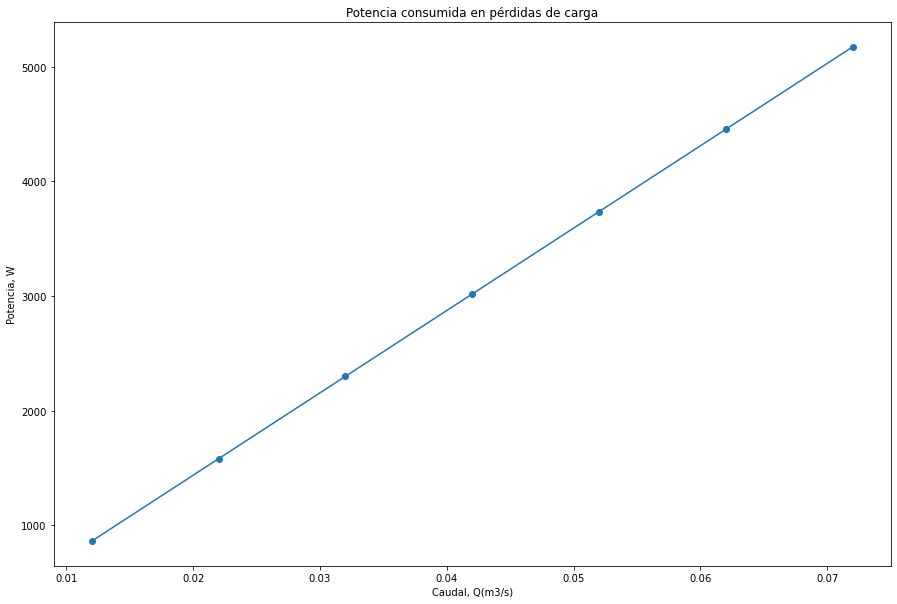

In [22]:
plt.plot(caudal, pot, 'o-') #pinta 10 puntos como o y los une con una linea continua 

#Personalización del gráfico
plt.xlabel("Caudal, Q(m3/s)") #etiqueta horizontal, del eje x
plt.ylabel("Potencia, W") #etiqueta vertical, del eje y 
plt.title("Potencia consumida en pérdidas de carga") #Título del gráfico
plt.rcParams['figure.figsize'] = [15, 10]  #tamaño del grafico en pulgadas, [width, height]


plt.show() #muestra el gráfico